@author: Antonio Rendon

Agosto 2023

# Distribución Normal:

La distribución normal, también conocida como distribución gaussiana, es una de las distribuciones más importantes y ampliamente utilizadas en estadísticas y ciencia de datos. Su gráfico es una curva en forma de campana que es simétrica respecto a su media, y está caracterizada por dos parámetros: la media (µ) y la desviación estándar (σ). La media indica dónde se centra el pico de la campana, mientras que la desviación estándar determina el ancho y la propagación de la campana.En este notebook vamos a trabajar con datos sobre la estatura de Mexicanos obtenidos en la __Encuesta Nacional de Salud y Nutrición (ENSANUT) 2018__ 


La primera parte de este ejercicio se centrara en realizar un EDA para poder hacer limpieza de datos y dejarlos listos para analizar graficamente nuestros resultados y posteriormente ya con los datos limpios, procederemos a graficas y observar las propiedades de la distribucion normal.

In [1]:
#Importamos librerias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Vamos a trabajar con el dataset de la Encuesta Nacional de Salud y Nutrición (ENSANUT) 2018

In [49]:
#Cargamos nuestro dataset
df= pd.read_csv(r'.\CN_ANTROPOMETRIA.csv', delimiter=';')

### EDA
Vamos a realizar primero un EDA para dejar limpios nuestros datos, para este caso en especifico solo nos interesa la edad y estatura de los encuestados

In [50]:
# Vamos a obtener solo el subset con las variables de interes
mexicanos=df[['TALLA4_1','EDAD']].copy()  #Usamos el metodo Copy para trabajar el nuevo df de forma independiente
# Veamos su forma
mexicanos

,TALLA4_1,EDAD
0,,73
1,148.0,30
2,136.4,10
3,105.5,3
4,152.1,49
...,...,...
33813,174.9,14
33814,121.0,7
33815,155.5,42
33816,141.7,9


In [51]:
print("-----------describe------------")
print(mexicanos.describe(include="all"))
print("----------info-------------")
print(mexicanos.info())

-----------describe------------
       TALLA4_1          EDAD
count     33818  33818.000000
unique     1344           NaN
top                       NaN
freq       4133           NaN
mean        NaN     28.341298
std         NaN     22.627940
min         NaN      0.000000
25%         NaN      9.000000
50%         NaN     21.000000
75%         NaN     45.000000
max         NaN    111.000000
----------info-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33818 entries, 0 to 33817
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TALLA4_1  33818 non-null  object
 1   EDAD      33818 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 528.5+ KB
None


___
Haciendo una primera revision encontramos los siguientes puntos a resolver

* Hay edades de 0 a 111 años, solo nos interesan los mayores de 18 años
* Las estaturas estan como tipo object y deberian de ser float
* Las estaturas deben ser mayor a 120 y menor de 220

Vamos a corregirlos


In [52]:
mexicanos['TALLA4_1'] = pd.to_numeric(mexicanos['TALLA4_1'], errors='coerce')
mexicanos.describe()


,TALLA4_1,EDAD
count,29685.000000,33818.000000
mean,144.212451,28.341298
std,29.406378,22.627940
min,45.500000,0.000000
25%,128.100000,9.000000
50%,152.500000,21.000000
75%,162.800000,45.000000
max,222.200000,111.000000


In [53]:
#Ahora vamos a delimitar nuestros datos, ya que solo queremos  personas mayores de 18 años
#Tambien vamos a quitar los outliers de estatura  mayor a 120 y menor a 220
mexicanos = mexicanos[(df['EDAD'] >= 18) & (mexicanos['TALLA4_1'] >= 120) & (mexicanos['TALLA4_1'] <= 220)]
mexicanos.describe()

,TALLA4_1,EDAD
count,14361.000000,14361.000000
mean,159.774159,36.860107
std,9.654051,12.011154
min,121.800000,18.000000
25%,152.700000,27.000000
50%,159.300000,37.000000
75%,166.600000,46.000000
max,196.200000,59.000000


In [55]:
#Vamos a revisar si hay NA
na_counts = mexicanos.isna().sum()
print(na_counts)

TALLA4_1    0
EDAD        0
dtype: int64


In [59]:
# Ya tenemos los datos, como solo nos interesan las estaturas vamos a pasarlos a una lista para facilitar su trabajo
estaturas = mexicanos['TALLA4_1'].tolist()

Ya tenemos listos nuestros datos para trabajar ,   primero vamos a obtener algunos datos estadisticos:
* media
* desviacion estandar

In [62]:
mu = np.mean(estaturas)
sigma = np.std(estaturas)

print("Media: " ,mu)
print("Desviacion estandar: " ,sigma)

Media:  159.77415918111552
Desviacion estandar:  9.653714723209603


## Graficas

Vamos a graficar el histograma de nuestras observaciones para tener una idea de su distribucion

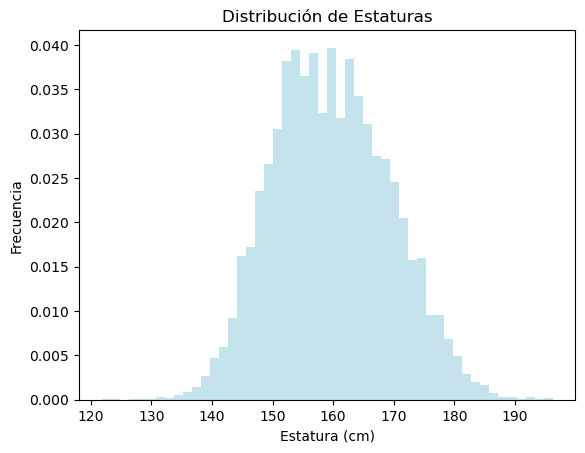

In [89]:
# Crear un histograma

plt.hist(estaturas, bins=50, color="lightblue", alpha=0.7, density=True)

# Títulos y etiquetas
plt.title('Distribución de Estaturas')
plt.xlabel('Estatura (cm)')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.grid(False)
plt.show()


Podemos ver que se trata de una forma de campana ya que se trata de una distribucion normal

Vamos a comparar contra una distribucion normal teorica, con la misma media y desviacion estandar, para ello usaremos la Funcion de densidad de probabilidad (PDF - Probability Density Function), con esto veremos que tanto se ajusta nuestra ditribucion real con la teorica.



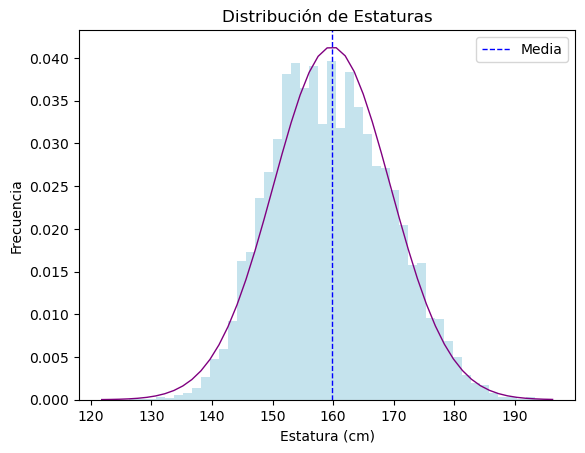

In [76]:
# Histograma con datos de nuestro dataset
conteo, x, barras=plt.hist(estaturas, bins=50, color="lightblue", alpha=0.7, density=True)

# Campana utilizando la función de densidad de probabilidad (Teorica)
plt.plot(x,
         1 / (sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2),
         linewidth=1, color="purple")

#Dibujamos la media
plt.axvline(mu, color='blue', linestyle='dashed', linewidth=1, label='Media')


# Títulos y etiquetas
plt.title('Distribución de Estaturas')
plt.xlabel('Estatura (cm)')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.legend()
plt.grid(False)
plt.show()


___
Ahora vamos a dibujar las lineas para mostrar las desviaciones estandar 
___

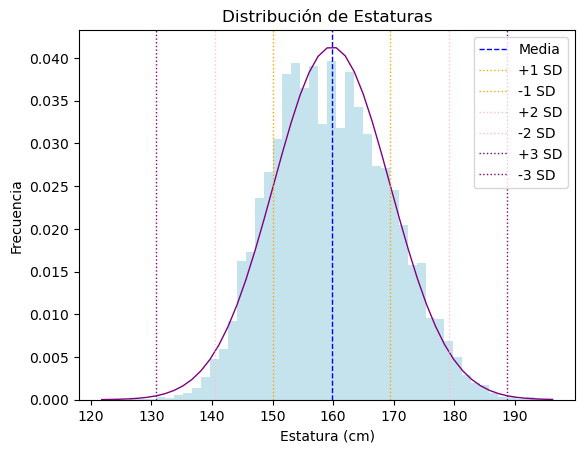

In [86]:
# Histograma con datos de nuestro dataset
conteo, x, barras=plt.hist(estaturas, bins=50, color="lightblue", alpha=0.7, density=True)

# Campana utilizando la función de densidad de probabilidad (Teorica)
plt.plot(x,
         1 / (sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2),
         linewidth=1, color="purple")

#Dibujamos la media
plt.axvline(mu, color='blue', linestyle='dashed', linewidth=1, label='Media')

#Lineas de las desviaciones estandar
colors_sd = ['orange', 'pink', 'purple']
for i, color in enumerate(colors_sd, 1):
    plt.axvline(mu + i*sigma, color=color, linestyle='dotted', linewidth=1, label=f'+{i} SD')
    plt.axvline(mu - i*sigma, color=color, linestyle='dotted', linewidth=1, label=f'-{i} SD')

# Títulos y etiquetas
plt.title('Distribución de Estaturas')
plt.xlabel('Estatura (cm)')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.legend()
plt.grid(False)
plt.show()


### Regla Empírica 68-95-99.7 de la Distribución Normal

La **regla empírica 68-95-99.7**, también conocida como la *regla del 68-95-99.7%* o la *regla de tres sigmas*, es una manera rápida y fácil de recordar las propiedades de una distribución normal (o gaussiana). Se refiere a las proporciones de datos que caen dentro de ciertos rangos en una distribución normal. En concreto:

1. **68%** de los datos caen dentro de **1 desviación estándar (σ)** de la media (μ).
2. **95%** de los datos caen dentro de **2 desviaciones estándar (2σ)** de la media (μ).
3. **99.7%** de los datos caen dentro de **3 desviaciones estándar (3σ)** de la media (μ).

Gráficamente, si tuvieras una curva normal perfectamente simétrica centrada en su media (μ), la regla se desglosaría de la siguiente manera:

$$
\text{Entre } μ - σ \text{ y } μ + σ: 68\% \text{ de los datos}
$$
$$
\text{Entre } μ - 2σ \text{ y } μ + 2σ: 95\% \text{ de los datos}
$$
$$
\text{Entre } μ - 3σ \text{ y } μ + 3σ: 99.7\% \text{ de los datos}
$$

Esta regla es útil cuando se desea tener una idea rápida de dónde se encuentran la mayoría de los valores en un conjunto de datos con distribución normal sin tener que hacer cálculos detallados. Sin embargo, es importante tener en cuenta que esta regla solo se aplica estrictamente a las distribuciones normales.

También hay que tener en cuenta que la regla empírica no da información sobre lo que ocurre más allá de 3 desviaciones estándar de la media, aunque en una distribución normal es extremadamente raro encontrar valores más allá de esos límites.



___
Vamos a comprobar si se cumple esta regla con nuestros datos: 
___

In [85]:
n = len(estaturas)
print("\n*** Regla Empírica 68-95-99.7 de la Distribución Normal ***\n")
print(f"{mu - sigma:.0f} - {mu + sigma:.0f} cm\t", 
      f"{mu - 2*sigma:.0f} - {mu + 2*sigma:.0f} cm\t",
      f"{mu - 3*sigma:.0f} - {mu + 3*sigma:.0f} cm")
print(f"{(np.where(((mu - sigma) < estaturas) & (estaturas < (mu + sigma)), 1, 0).sum()*100)/n:.3f} %\t",  
      f"{(np.where(((mu - 2*sigma) < estaturas) & (estaturas < (mu + 2*sigma)), 1, 0).sum()*100)/n:.3f} %\t",  
      f"{(np.where(((mu - 3*sigma) < estaturas) & (estaturas < (mu + 3*sigma)), 1, 0).sum()*100)/n:.3f} %\t")



*** Regla Empírica 68-95-99.7 de la Distribución Normal ***

150 - 169 cm	 140 - 179 cm	 131 - 189 cm
66.103 %	 96.309 %	 99.812 %	


Los valores son muy cercanos a los teoricos, con ello reforzamos lo visto en las graficas anteriores.

### Conclusiones:

Las estaturas de los mexicanos encuestados tienen el siguiente comportamiento:

Rango 150 - 169 cm: Cerca de 2 de cada 3 mexicanos tienen una estatura entre estos límites. Es el rango más común y, si fueras a conocer a un mexicano al azar, hay una alta probabilidad de que su estatura se encuentre aquí.

Rango 140 - 179 cm: Al ampliar un poco más el rango, prácticamente 96 de cada 100 mexicanos caen en este rango de estatura. Esto nos dice que las estaturas extremadamente bajas o extremadamente altas son raras.

Rango 131 - 189 cm: Si nos vamos a los extremos, casi todos (99.8 de cada 100) mexicanos tienen estaturas en este rango. Esto indica que es extremadamente raro encontrar mexicanos por debajo de 131 cm o por encima de 189 cm.

___
La distribución normal nos ha permitido comprender de manera eficiente cómo se distribuyen las estaturas de los mexicanos en relación con su promedio. Nos ha mostrado que la mayoría de las personas se agrupan cerca de ese promedio y que hay menos personas a medida que nos alejamos de ese valor central. Esto nos da una imagen clara de la variabilidad y nos ayuda a identificar qué tan comunes o raros son ciertos rangos de estatura dentro de la población mexicana.
